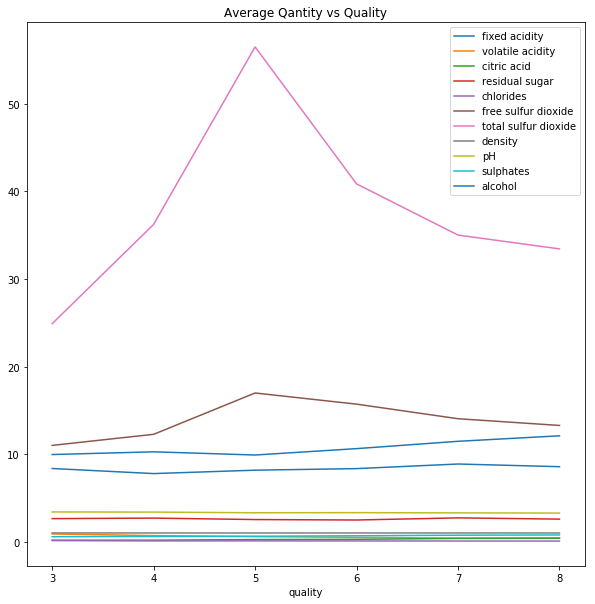

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics as st
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv("winequality-red.csv",delimiter=";")
df_new=df.groupby("quality").mean()
df_new.plot(kind='line',figsize=(10,10))
plt.title("Average Qantity vs Quality")
plt.legend(loc="best")
plt.show()

In [10]:
#df['quality']=df.quality.astype(float)
#df.info()

In [11]:
df["quality"]=df.quality.replace([1,2,3,4,5],"Poor")
df["quality"]=df.quality.replace([6,7,8,9,10],"Good")

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Poor


In [14]:
#df=sklearn.utils.shuffle(df)
df_choices_x=df[df.columns[[0,1,2,3,4,7,8,9,10]]]
df_taget_y=df["quality"]
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [15]:
df_choices_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4


In [16]:
#plt.scatter(df_choices_x['free sulfur dioxide'],df_taget_y,label="free sulfur dioxide")
#plt.scatter(df_choices_x["total sulfur dioxide"],df_taget_y,label="total sulfur dioxide")
#plt.ylabel("Quality / df_target_y")
#plt.xlabel("free sulfur dioxide and total sulfur dioxide / df_choices_x")
#plt.legend(loc="best")
#plt.show()

In [17]:
df_choices_x=df[df.columns[[0,1,2,3,4,7,8,9,10]]].values
df_taget_y=df["quality"].values

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn=KNeighborsClassifier(n_neighbors=43,metric='euclidean',weights='distance')

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_choices_x, df_taget_y, test_size=0.3, random_state=0)

In [29]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#sc.fit(x_train)
#x_train_std=sc.transform(x_train)
#x_test_std=sc.transform(x_test)

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=43, p=2,
           weights='distance')

In [31]:
knn.score(x_test,y_test)

0.775

In [32]:
pred=knn.predict(x_test)

In [33]:
print(round(float(sum(pred==y_test))/len(y_test),2))

0.78


In [34]:
error=[]
for i in range(1,70):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',weights='distance')
    knn.fit(x_train,y_train)
    predi=knn.predict(x_test)
    error.append(np.mean(predi!=y_test))
for i,er in enumerate(error):
    if error[i]==min(error):
        print("the minimum error is at range or say with nearest neighbour of : "+str(i))

the minimum error is at range or say with nearest neighbour of : 43
the minimum error is at range or say with nearest neighbour of : 44
the minimum error is at range or say with nearest neighbour of : 45


Text(0, 0.5, 'Mean Error')

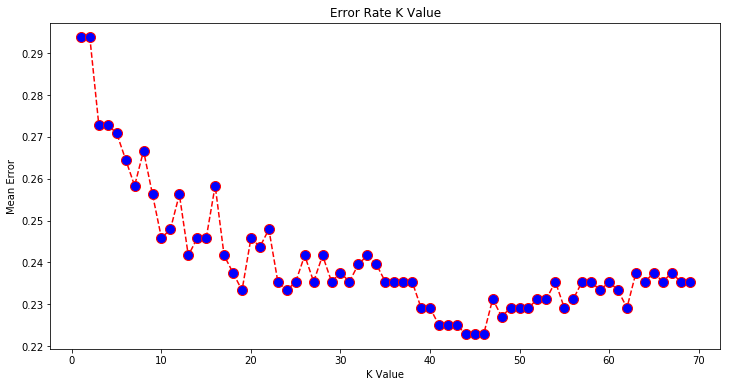

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 70), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [36]:
accuracy1_train=[]
accuracy1_test=[]
for i in range(1, 45):  
    knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski',weights='distance')
    knn.fit(x_train, y_train)
    accuracy1_train.append(knn.score(x_train, y_train))
    accuracy1_test.append(knn.score(x_test, y_test))

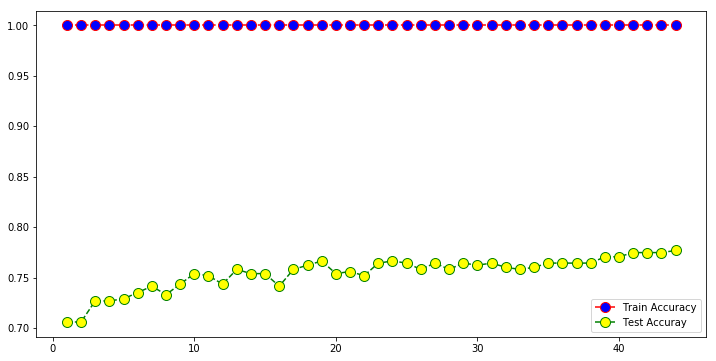

In [37]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 45), accuracy1_train, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10,label="Train Accuracy")
plt.plot(range(1, 45), accuracy1_test, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10,label="Test Accuray")
plt.legend()
plt.show()

<p><ul><b> As you can see above that the plot above overlaps the other points as a result we cannot use the k-nearest neighbours algorithm to do our work to distinguish between the points so as a result we could use an algorithem of higer dimentionality or logistic regression</b></ul></p>
<p><center><b>To prove the point i have shown an example below which gives out the lowest prediction</b></center></p>


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_choices_x, df_taget_y, test_size=0.3, random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [40]:
y_train

array(['Poor', 'Good', 'Poor', ..., 'Good', 'Good', 'Poor'], dtype=object)

In [41]:
clf = RandomForestClassifier(n_estimators=29)

In [42]:
clf0=clf.fit(x_train_std,y_train)

In [43]:
pred=clf0.predict(x_test_std)

In [44]:
accuracy_score(y_test,pred)

0.7729166666666667

In [45]:
print(round(float(sum(pred==y_test))/len(y_test),2))

0.77


In [46]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 100):  
    clf1 = RandomForestClassifier(n_estimators=i)
    clf2=clf1.fit(x_train_std,y_train)
    pred=clf2.predict(x_test_std)
    error.append(np.mean(pred != y_test))

Text(0, 0.5, 'Mean Error')

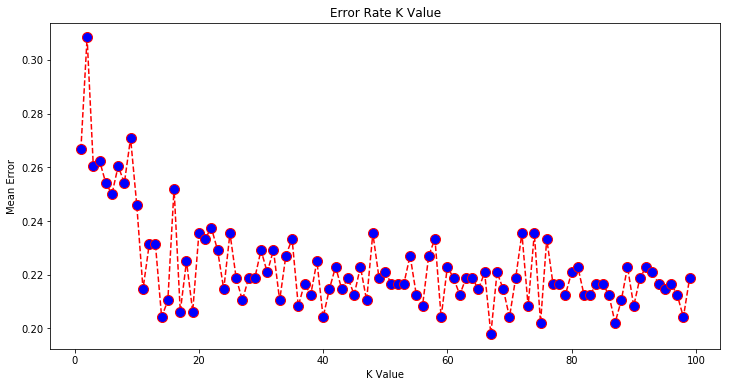

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [48]:
error1_train=[]
error1_test=[]
for i in range(1, 40):  
    clf1 = RandomForestClassifier(n_estimators=i)
    clf1.fit(x_train_std,y_train)
    error1_train.append(clf1.score(x_train_std, y_train))
    error1_test.append(clf1.score(x_test_std, y_test))

<body><p><b>model.score(x,y)</b> is basically takes the training data output results...thats then it gives the values comparing with the accuracy of the testing sets. let me be a little more clear at first we have trained our data <b>"clf1.fit(x_train_std,y_train)"</b> and now we have got the related coeffient of the equations to predict the output/values on any other given samples of data...later the score takes the sample <b>x_test values finds out the answer or does its prediction</b> and then <b>compares it with the given y_test thus producing us the accuracy values at one go...model.score(x_test,y_test)</b></p><br>
    <p>Now that we know about the function of score let us talk about what happens when we use <b>x and y train</b> instead of test values of the split</p><ul><li>The values is already trained on a particular parameter ....and now if we find out the answer based o its own parameter we will get very much near to hieghest accuracy<li>So lets be a little more clear..<li>suppose lets say we have <b>linear regression equation(y=mx+c)</b> and we have the value of y and the x given so after training means using the values of x and y we get the model values of m(slope) and c(y-intercept)...example <b>x_train=[2,5,3,8,9] and y_train=[10,12,5,8,9]</b> so now that we get the slope and y intercept we know that the particular value of x the given value of y will occur <li> Now if you use <b>model.score(x_train,y_train)</b> the m and c value will be the same as that of the training value set to predict y and when it compares with the y_train it will give maximum of accuracy answer
 </ul></body>  

Text(0.5, 1.0, 'Train and Testing Accuracy')

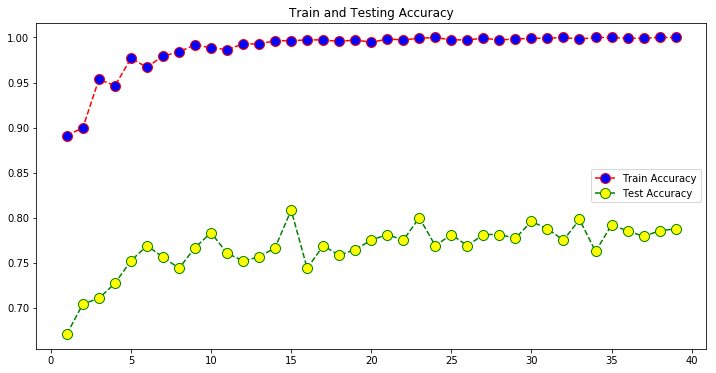

In [49]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error1_train, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10,label="Train Accuracy")
plt.plot(range(1, 40), error1_test, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10,label="Test Accuracy")
plt.legend(loc=5)
plt.title('Train and Testing Accuracy')